[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1mUDx4uFpbS6jrD7lN-P7F7saefP_QJ31?usp=sharing)

# Testing differents models from lab session week 8 and week 9 (Word embedding, Word2Vec, Doc2Vec, TF-IDF).

Disclaimer : this notebook is a mix of our function implemented into the lab session "Week 8" and "Week 9". A lot of cellules are taking from the lab session (Word embedding with Word2Vec).

##Loading data and packages

In [ ]:
# Training data and import some packages
import pandas as pd
import numpy as np
path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/training_data.csv"
df = pd.read_csv(path, index_col=0)

In [ ]:
# Import required packages
!python -m spacy download fr_core_news_sm
#import fr_core_news_sm
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 14.7 MB 8.7 MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-py3-none-any.whl size=14727026 sha256=117a8e5b723f9be5f53ee6765d73e5d7838e17dfe3d12382806d8a95eaaf3675
  Stored in directory: /tmp/pip-ephem-wheel-cache-ygtru02a/wheels/c9/a6/ea/0778337c34660027ee67ef3a91fb9d3600b76777a912ea1c24
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
# Import additional packages
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr.examples import sentences 
from spacy.lang.fr import French
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#Look at the data firt
df.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [ ]:
df_pred = pd.read_csv(path, index_col=0)
df_pred.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/sample_submission.csv"
df_example_submission = pd.read_csv(path, index_col=0)
df_example_submission.head()

,difficulty
id,
0,A1
1,A1
2,A1
3,A1
4,A1


#  Word Embedding with Word2Vec

In [ ]:
sp = !python -m spacy download fr_core_news_sm

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Create a list of punctuation marks
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create a list of stopwords
#stop_words = spacy.lang.en.stop_words.STOP_WORDS
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

list(stop_words)[:10]

['cet',
 'differentes',
 'jusqu',
 'ouverte',
 'pur',
 'unes',
 'soit',
 'faisaient',
 'deuxièmement',
 'alors']

In [ ]:
# Load French language model
sp = spacy.load('en_core_web_sm')
#sp = spacy.load('fr_core_news_sm')

# Create tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    ## alternative way
    # mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

# Example
#New_sentence = df["sentence"].sample()
New_sentence = df["sentence"].head()
New_sentence.values[0]

"Les coûts kilométriques réels peuvent diverger sensiblement des valeurs moyennes en fonction du moyen de transport utilisé, du taux d'occupation ou du taux de remplissage, de l'infrastructure utilisée, de la topographie des lignes, du flux de trafic, etc."

In [ ]:
spacy_tokenizer(New_sentence.values[0])

['coût',
 'kilométrique',
 'réel',
 'diverger',
 'sensiblement',
 'valeur',
 'moyenne',
 'fonction',
 'moyen',
 'transport',
 'utilisé',
 'taux',
 "d'occupation",
 'taux',
 'remplissage',
 "l'infrastructure",
 'utilisée',
 'topographie',
 'lignes',
 'flux',
 'trafic']

In [ ]:
#Vectorization Feature Engineering (TF-IDF)
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer

In [ ]:
texts = df['sentence']


In [ ]:
# Create tokenizer function for preprocessing
def spacy_tokenizer(text):

    # Define stopwords, punctuation, and numbers
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    punctuations = string.punctuation
    numbers = "0123456789"

    # Create spacy object
    mytokens = sp(text)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove sufix like ".[1" in "experience.[1"
    mytokens_2 = []
    for word in mytokens:
      for char in word:
        if (char in punctuations) or (char in numbers):
          word = word.replace(char, "")
      if word != "":
        mytokens_2.append(word)

    # Return preprocessed list of tokens
    return mytokens_2

# Tokenize texts
processed_texts = []
for text in texts:
  processed_text = spacy_tokenizer(text)
  processed_texts.append(processed_text)

In [ ]:
for processed_text in processed_texts:
  print(processed_text[:20])

['les', 'coût', 'kilométrique', 'réel', 'peuvent', 'diverger', 'sensiblement', 'des', 'valeur', 'moyenne', 'en', 'fonction', 'du', 'moyen', 'de', 'transport', 'utilisé', 'du', 'taux', 'doccupation']
['le', 'bleu', 'cest', 'ma', 'couleur', 'préférée', 'mais', 'je', 'naime', 'pas', 'le', 'vert']
['le', 'test', 'de', 'niveau', 'en', 'français', 'est', 'sur', 'le', 'site', 'internet', 'de', 'lécole']
['est', 'ce', 'que', 'ton', 'mari', 'est', 'aussi', 'de', 'boston']
['dan', 'les', 'écoles', 'de', 'commerce', 'dan', 'les', 'couloirs', 'de', 'places', 'financière', 'il', 'arrive', 'aujourdhui', 'de', 'croiser', 'de', 'jeunes', 'adultes', 'de']
['voilà', 'une', 'autre', 'histoire', 'que', 'jai', 'beaucoup', 'aimée']
['les', 'médecin', 'disent', 'souvent', 'quon', 'doit', 'boire', 'un', 'verre', 'de', 'vin', 'rouge', 'après', 'les', 'repas']
['il', 'est', 'particulièrement', 'observé', 'chez', 'les', 'personnes', 'ayant', 'un', 'besoin', 'de', 'popularité', 'développé', 'qui', 'considèrent', 

In [ ]:
# Word embedding 
### Parameters: 
#     - min_count: minimum number of occurence of single word in corpus to be taken into account
#     - size: dimension of the vectors representing the tokens
#     - IMPORTANT: processed_texts must be a list of lists of tokens object!
word2vec = Word2Vec(processed_texts, min_count=2, size=100)
vocab = word2vec.wv.vocab
print(vocab)

{'les': <gensim.models.keyedvectors.Vocab object at 0x7f6075a5ca50>, 'coût': <gensim.models.keyedvectors.Vocab object at 0x7f607a9bdb10>, 'kilométrique': <gensim.models.keyedvectors.Vocab object at 0x7f6075ab0bd0>, 'réel': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b6b90>, 'peuvent': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b6ed0>, 'sensiblement': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b6f10>, 'des': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b6890>, 'valeur': <gensim.models.keyedvectors.Vocab object at 0x7f607b340050>, 'moyenne': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b6310>, 'en': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b67d0>, 'fonction': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b5a90>, 'du': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b5310>, 'moyen': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b5f90>, 'de': <gensim.models.keyedvectors.Vocab object at 0x7f607a9b5550>, 'transport':

In [ ]:
# Vector
v1 = word2vec.wv['fait'] 
v1

array([ 8.76346827e-01, -8.34072351e-01, -1.01632261e+00, -3.09934288e-01,
       -6.61135256e-01,  5.73403180e-01, -2.25818038e-01, -4.87840384e-01,
       -4.21903700e-01, -5.57996571e-01, -2.70984292e-01,  1.22057982e-01,
       -3.35561424e-01, -4.32480067e-01,  2.74258703e-01,  4.40624624e-01,
       -4.88954842e-01,  3.03893626e-01,  1.53730616e-01, -2.66829520e-01,
        1.59509361e-01, -7.04976842e-02,  5.42734973e-02,  1.05569489e-01,
       -5.76674700e-01, -4.25697356e-01, -2.35927805e-01, -3.32852393e-01,
        1.29742518e-01,  4.34343815e-01, -3.24020505e-01, -7.41999209e-01,
       -8.92511725e-01,  7.14782000e-01,  2.52185781e-02,  8.14558446e-01,
        4.06608224e-01, -6.55911863e-02, -5.22633791e-01,  2.26517364e-01,
       -5.50376177e-01, -1.35582417e-01, -4.54506516e-01,  3.19340825e-01,
        3.19757402e-01, -5.17187715e-01,  1.21177763e-01, -3.01482618e-01,
        9.34225842e-02,  9.48808372e-01,  1.74053296e-01,  8.99083614e-01,
        8.96525681e-01, -

In [ ]:
# Similar vectors/words
sim_words = word2vec.wv.most_similar('fait')
sim_words

[('cette', 0.9999585151672363),
 ('tout', 0.999958336353302),
 ('pour', 0.9999582767486572),
 ('où', 0.9999582171440125),
 ('lui', 0.9999575614929199),
 ('un', 0.9999571442604065),
 ('se', 0.9999570846557617),
 ('quil', 0.9999569654464722),
 ('faire', 0.9999566674232483),
 ('ces', 0.9999562501907349)]

In [ ]:
# Similarity between two words
word2vec.wv.similarity('certain', 'demeure')

0.99105656

In [ ]:
#### **** **************** **** ####
#### **** LEXICAL FEATURES **** ####
#### **** **************** **** ####

# Lexical Diversity
def lex_div_word(sent):
  total_number_word = len(sent.split())
  unique = set(sent.split())
  return(len(unique)/total_number_word)
#We don't apply for token, as the goal of the tokenzization is to be left with 
#unique tokens
#For tokens, we should apply to the whole text as done by tfidf_vector

# Lexical Density
def lex_den_tokens(sent):
  st = spacy_tokenizer(sent)
  string = " ".join([str(item) for item in st])
  x = sp(string)
  counter = 0 
  for token in x:
    if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "VERB" or token.pos_ == "ADV":
      counter = counter + 1
  if len(st) == 0:
    return(0)
  else:
    return(counter/len(st))

def lex_den_words(sent):
  x = sp(sent)
  counter = 0 
  for token in x:
    if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "VERB" or token.pos_ == "ADV":
      counter = counter + 1
  return(counter/len(x))

# Words NOT in frequent list
path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/list_words.csv"
words = pd.read_csv(path, index_col=0)


def words_list(sent):
  unique = set(sent.split())
  counter = 0
  for word_in_sentence in unique:
    for word_in_list in words.Mots:
      if word_in_sentence == word_in_list:
        counter = counter + 1
        break#we stop comparing once the word in found, to make it faster
  return(counter/len(unique))


def token_list(sent):
  unique = spacy_tokenizer(sent)
  counter = 0
  for word_in_sentence in unique:
    for word_in_list in words.Mots:
      if word_in_sentence == word_in_list:
        counter = counter + 1
        break#we stop comparing once the word in found, to make it faster
  return(counter/len(unique))

#  Complaints Classification: TF-IDF vs. Doc2Vec

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    4800 non-null   object
 1   difficulty  4800 non-null   object
dtypes: object(2)
memory usage: 112.5+ KB


In [ ]:
# Base rate: the data-set is a bit balanced!
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

In [ ]:
# Drop NaN
print(df.isnull().sum())
df = df.dropna().reset_index(drop=True)
df.head()

sentence      0
difficulty    0
dtype: int64


,sentence,difficulty
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentence    4800 non-null   object
 1   difficulty  4800 non-null   object
dtypes: object(2)
memory usage: 75.1+ KB


In [ ]:
# Total number of words - over 600,000
df['sentence'].apply(lambda x: len(x.split(' '))).sum()

87209

In [ ]:
# Sample
df['sentence'].sample().values[0]

'Venez ici.'

In [ ]:
# Imbalanced dataset
df.difficulty.value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


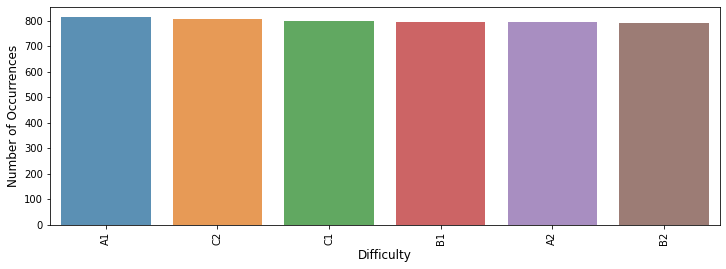

In [ ]:
# Plot number of complaints per category
cnt_pro = df['difficulty'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Difficulty', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Base rate
round(df.difficulty.value_counts().max()/ len(df), 4)

0.1694

In [ ]:
# Select features
X = df[["sentence"]]# the features we want to analyze

ylabels = df['difficulty'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=1234, stratify=ylabels)

X_train

,sentence
962,Le réalisateur m'a d'abord demandé de me mettr...
1886,"Après quelques mois de cette pauvreté noble, a..."
2721,L'indicateur n'était que de 40% chez les femme...
1025,L'objectif de ce type de voyage est d'être act...
4048,"Et, en France, beaucoup moins de filles que de..."
...,...
3693,Je vais prendre ma douche dans ma salle-de-bain.
3408,"Après l'éruption de 1754, la plus grosse connu..."
4289,Léonard est initié par Verrocchio aux nombreus...
3312,"On en trouve des exemples dans l'ouvrage ""L'in..."


In [ ]:
y_train

962     B1
1886    C1
2721    A2
1025    B1
4048    B2
        ..
3693    A1
3408    B1
4289    C2
3312    C2
269     A1
Name: difficulty, Length: 3840, dtype: object

In [ ]:
from sklearn.compose import ColumnTransformer

# Define classifier
classifier = LogisticRegression(multi_class="multinomial",max_iter=1000)

#Vectorizer
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)

#Column Transformer (to apply vectorizer to the right column)
column_transformer = ColumnTransformer(
    [("tfidf", tfidf_vector, "sentence")],
    remainder="passthrough")

# Create pipeline
pipe = Pipeline([("tfidf",column_transformer),("classifier", classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf',
                                                  TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7f607b6aae60>),
                                                  'sentence')])),
                ('classifier',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [ ]:
# Evaluate the model
def evaluate(test, pred):
  precision = precision_score(test, pred,average=None)
  recall = recall_score(test, pred, average=None)
  f1= f1_score(test, pred, average=None)
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:')
  print("Precision:\t {0:4f}".format(precision_score(test, pred,average="macro"))) 
  print("Recall:\t {0:4f}".format(recall_score(test, pred, average="macro")))
  print("F1_Score:\t {0:4f}".format(f1_score(test, pred, average="macro")))

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[103  30  17   7   4   2]
 [ 35  64  34   7   8  11]
 [ 19  40  49  24  11  16]
 [  6  10  12  59  36  35]
 [ 12   2   7  32  67  40]
 [  8   4   9  14  29  97]]
ACCURACY SCORE:
0.4573
CLASSIFICATION REPORT:
Precision:	 0.449959
Recall:	 0.456208
F1_Score:	 0.450736


## 3.3 Classification using TF-IDF and Logistic Regression

In [ ]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#### **** **************** **** ####
#### **** LEXICAL FEATURES **** ####
#### **** **************** **** ####

# Lexical Diversity
def lex_div_word(sent):
  total_number_word = len(sent.split())
  unique = set(sent.split())
  return(len(unique)/total_number_word)
#We don't apply for token, as the goal of the tokenzization is to be left with 
#unique tokens
#For tokens, we should apply to the whole text as done by tfidf_vector

# Lexical Density
def lex_den_tokens(sent):
  st = spacy_tokenizer(sent)
  string = " ".join([str(item) for item in st])
  x = sp(string)
  counter = 0 
  for token in x:
    if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "VERB" or token.pos_ == "ADV":
      counter = counter + 1
  if len(st) == 0:
    return(0)
  else:
    return(counter/len(st))

def lex_den_words(sent):
  x = sp(sent)
  counter = 0 
  for token in x:
    if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "VERB" or token.pos_ == "ADV":
      counter = counter + 1
  return(counter/len(x))

# Words NOT in frequent list
path = "https://raw.githubusercontent.com/Lirette2/DMML2021_Apple/main/data/list_words.csv"
words = pd.read_csv(path, index_col=0)


def words_list(sent):
  unique = set(sent.split())
  counter = 0
  for word_in_sentence in unique:
    for word_in_list in words.Mots:
      if word_in_sentence == word_in_list:
        counter = counter + 1
        break#we stop comparing once the word in found, to make it faster
  return(counter/len(unique))


def token_list(sent):
  unique = spacy_tokenizer(sent)
  counter = 0
  for word_in_sentence in unique:
    for word_in_list in words.Mots:
      if word_in_sentence == word_in_list:
        counter = counter + 1
        break#we stop comparing once the word in found, to make it faster
  return(counter/len(unique))

In [ ]:
# Define tokenizer function
def spacy_tokenizer(sentence):

    punctuations = string.punctuation
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove anonymous dates and people
    mytokens = [ word.replace('xx/', '').replace('xxxx/', '').replace('xx', '') for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in ["xxxx", "xx", ""] ]

    # Return preprocessed list of tokens
    return mytokens

In [ ]:
# Select features
X = df['sentence'] # the features we want to analyze
ylabels = df['difficulty'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=1234)

X_train

1320    Vous êtes biologiste, militante passionnée de ...
1374    L'épidémie de coronavirus nous contraint à épr...
3502                                     Elle est rapide.
1613    Je ne crois pas qu'on doive interdire aux gens...
462     Je me débattais intérieurement : j'étais indig...
                              ...                        
664     Cependant, pour ne pas tomber dans le piège de...
3276                      Il pleut et j'attends l'autobus
1318    Mais les chocs pétroliers plongent la France d...
723     Faire de la philosophie avec des intonations a...
2863    Une petite révolution et des chiffres qui parl...
Name: sentence, Length: 3840, dtype: object

In [ ]:
y_train

1320    C1
1374    C2
3502    A1
1613    B1
462     C2
        ..
664     B2
3276    A1
1318    C1
723     B1
2863    B1
Name: difficulty, Length: 3840, dtype: object

In [ ]:
%%time
# Define vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), tokenizer=spacy_tokenizer)

# Define classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

CPU times: user 41.2 s, sys: 1.01 s, total: 42.2 s
Wall time: 42.3 s


0.3917


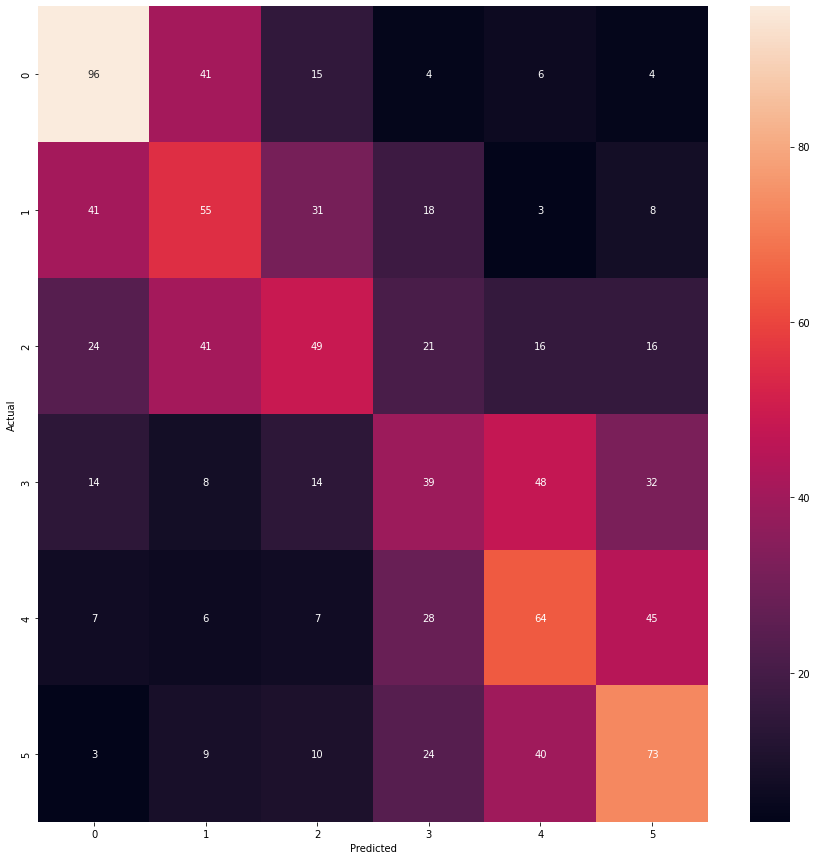

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Evaluate the model
def evaluate(test, pred):
  precision = precision_score(test, pred,average=None)
  recall = recall_score(test, pred, average=None)
  f1= f1_score(test, pred, average=None)
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:')
  print("Precision:\t {0:4f}".format(precision_score(test, pred,average="macro"))) 
  print("Recall:\t {0:4f}".format(recall_score(test, pred, average="macro")))
  print("F1_Score:\t {0:4f}".format(f1_score(test, pred, average="macro")))

In [ ]:
#Essayer de faire les prédictions 
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[96 41 15  4  6  4]
 [41 55 31 18  3  8]
 [24 41 49 21 16 16]
 [14  8 14 39 48 32]
 [ 7  6  7 28 64 45]
 [ 3  9 10 24 40 73]]
ACCURACY SCORE:
0.3917
CLASSIFICATION REPORT:
Precision:	 0.385716
Recall:	 0.390444
F1_Score:	 0.385991


## Doc2Vec


In [ ]:
# Tokenize data - same tokenizer function as before
%%time
from gensim.models.doc2vec import TaggedDocument
sample_tagged = df.apply(lambda r: TaggedDocument(words=spacy_tokenizer(r['sentence']), tags=[r.difficulty]), axis=1)
print(sample_tagged.head(20))

0     ([les, coût, kilométrique, réel, peuvent, dive...
1     ([le, bleu, c'est, ma, couleur, préférée, mais...
2     ([le, test, de, niveau, en, français, est, sur...
3     ([est, ce, que, ton, mari, est, aussi, de, bos...
4     ([dan, les, écoles, de, commerce, dan, les, co...
5     ([voilà, une, autre, histoire, que, j'ai, beau...
6     ([les, médecin, disent, souvent, qu'on, doit, ...
7     ([il, est, particulièrement, observé, chez, le...
8     ([j'ai, retrouvé, le, plaisir, de, manger, un,...
9     ([nous, allon, bien, nous, habiton, dan, une, ...
10                  ([bonjour, et, bonne, année], [A1])
11    ([la, presse, s'est, abondamment, fait, l'écho...
12    ([pour, que, le, rocher, s'ouvre, il, faut, le...
13    ([j'habite, une, belle, ville, dans, le, nord,...
14    ([certe, il, doit, répondre, aux, goûts, du, c...
15    ([ma, timidité, quittait, dès, que, je, m'éloi...
16    ([je, pense, que, fréquenter, les, galeries, e...
17    ([le, soir, je, cuche, tôt, parce, que, je

In [ ]:
sample_tagged.values[10]

TaggedDocument(words=['bonjour', 'et', 'bonne', 'année'], tags=['A1'])

In [ ]:
# Train test split - same split as before
train_tagged, test_tagged = train_test_split(sample_tagged, test_size=0.2, random_state=1234)

train_tagged

1320    ([vous, ête, biologiste, militante, passionnée...
1374    ([l'épidémie, de, coronavirus, nous, contraint...
3502                          ([elle, est, rapide], [A1])
1613    ([je, ne, crois, pas, qu'on, doive, interdire,...
462     ([je, débattai, intérieurement, j'étais, indig...
                              ...                        
664     ([cependant, pour, ne, pas, tomber, dans, le, ...
3276        ([il, pleut, et, j'attends, l'autobus], [A1])
1318    ([mais, les, chocs, pétrolier, plongent, la, f...
723     ([faire, de, la, philosophie, avec, des, inton...
2863    ([une, petite, révolution, et, des, chiffres, ...
Length: 3840, dtype: object

In [ ]:
test_tagged

4448    ([avant, de, laisser, la, parole, à, monsieur,...
3022    ([quand, je, reviendrai, j'offrirai, beaucoup,...
827                  ([un, beau, succès, d'estime], [C1])
1745    ([pour, clore, cette, monographie, du, café, c...
4202    ([l'une, des, plus, emblématique, est, marie, ...
                              ...                        
3640    ([j'ai, mangé, un, hamburger, et, des, frites]...
2229    ([organisée, à, l'occasion, du, 700e, annivers...
319     ([à, noter, que, l'apprentissage, de, la, gram...
4697    ([l'origine, politique, du, sens, moderne, du,...
1416    ([nous, avon, une, grande, maison, avec, un, c...
Length: 960, dtype: object

In [ ]:
# Allows to speed up a bit
import multiprocessing
cores = multiprocessing.cpu_count()

In [ ]:
# Define Doc2Vec and build vocabulary
from gensim.models import Doc2Vec

model_dbow = Doc2Vec(dm=0, vector_size=30, negative=6, hs=0, min_count=1, sample=0, workers=cores, epoch=300)
model_dbow.build_vocab([x for x in train_tagged.values])

In [ ]:
# Train distributed Bag of Word model
model_dbow.train(train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

In [ ]:
# Select X and y
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=100)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
# Each document (i.e. complaint) is now a vector in the space of 30 dimentions.
# Similar complaints should have similar vector representation.
X_train[:3]

(array([-0.02589933, -1.0904654 , -0.2002864 ,  0.3951751 ,  1.3958573 ,
        -0.72911024,  1.1219679 ,  1.8599566 , -0.13462104, -0.8733165 ,
         0.20913693, -0.10797866, -0.30100077,  0.22980535, -0.6390501 ,
         0.15458784,  1.0824448 , -1.1868608 , -0.10591803,  1.4994097 ,
        -2.1715133 , -1.151091  ,  0.15131137, -0.58674365, -0.10731032,
         1.0029433 , -0.971173  , -0.14511864, -0.7606084 ,  0.6213734 ],
       dtype=float32),
 array([ 0.51511836, -1.5419222 , -1.212213  , -0.3122278 ,  0.9570794 ,
        -0.45323998,  1.0072197 ,  1.8275565 ,  0.19751906,  0.16904597,
         0.44921365, -0.4363734 , -0.8220208 ,  0.36982504, -1.1585413 ,
        -0.0423959 ,  1.0910468 , -0.92696106, -0.00554518,  1.4486045 ,
        -1.6993878 , -0.18788072, -0.2743239 , -0.41855997, -0.7969991 ,
         0.31607026, -1.5154061 ,  0.18527399, -0.963043  ,  0.68011004],
       dtype=float32),
 array([ 0.14558165, -0.61834294, -0.3138503 ,  0.05038524,  0.5974639 ,
   

0.4312


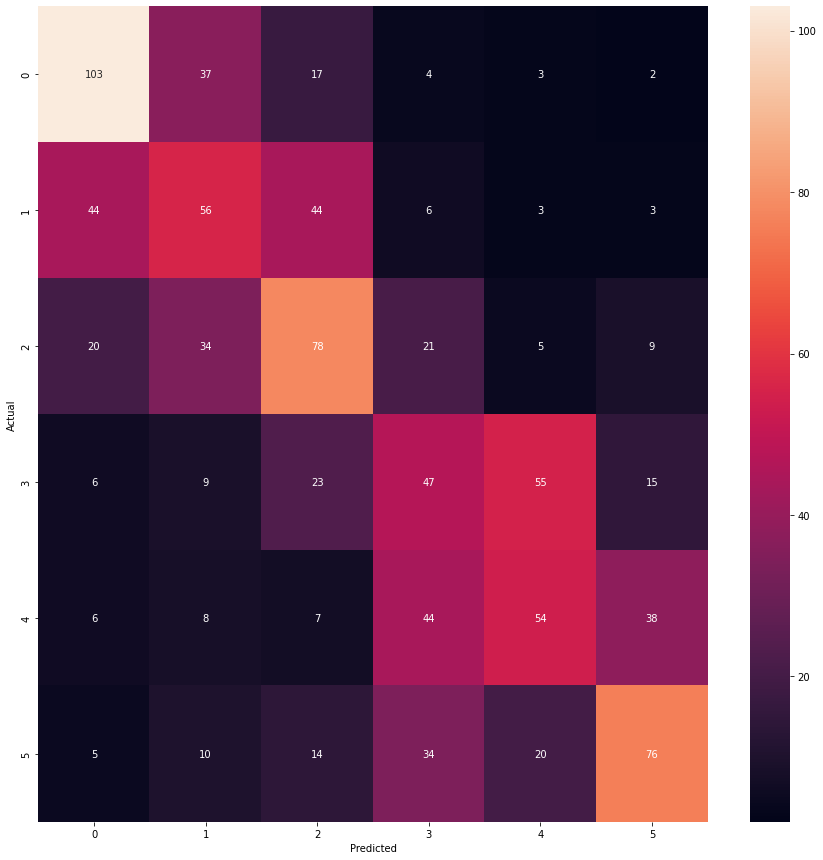

In [ ]:
# Fit model on training set - same algorithm as before
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Evaluate the model
def evaluate(test, pred):
  precision = precision_score(test, pred,average=None)
  recall = recall_score(test, pred, average=None)
  f1= f1_score(test, pred, average=None)
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:')
  print("Precision:\t {0:4f}".format(precision_score(test, pred,average="macro"))) 
  print("Recall:\t {0:4f}".format(recall_score(test, pred, average="macro")))
  print("F1_Score:\t {0:4f}".format(f1_score(test, pred, average="macro")))

In [ ]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

AttributeError: ignored